In [4]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn

In [5]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url, index_col=[0])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


##  using boston data to show the distribuation and the Outliers Edges of the MEDV (Median value of owner-occupied homes)

the minimum MEDV has 5.0
25% MEDV has 17.025
the median MEDV has 21.2
75% MEDV has 25.0
the maximum MEDV has 50.0
interqurtile of the MEDV is 7.975000000000001
Ouliers Edges are (37.760000000000005, 4.264999999999995)


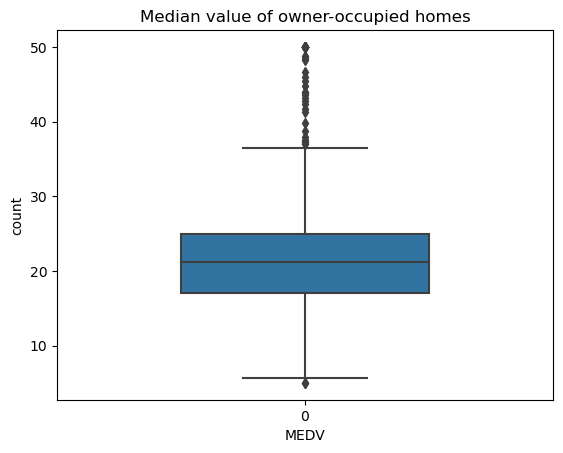

In [6]:
import seaborn as sns
print(f'the minimum MEDV has {boston_df["MEDV"].min()}')
print(f'25% MEDV has {boston_df["MEDV"].quantile(q=0.25)}')
print(f'the median MEDV has {boston_df["MEDV"].median()}')
print(f'75% MEDV has {boston_df["MEDV"].quantile(0.75)}')
print(f'the maximum MEDV has {boston_df["MEDV"].max()}')
IQR = boston_df["MEDV"].quantile(0.75) - boston_df["MEDV"].quantile(q=0.25)
print(f'interqurtile of the MEDV is {IQR}')
oulierEdge1 = boston_df["MEDV"].quantile(q=0.75) + 1.6*IQR
oulierEdge2 = boston_df["MEDV"].quantile(q=0.25) - 1.6*IQR
print(f'Ouliers Edges are ({oulierEdge1}, {oulierEdge2})')
sns.boxplot(data = boston_df['MEDV'], width=0.5)
plt.title('Median value of owner-occupied homes')
plt.xlabel('MEDV')
plt.ylabel('count')
plt.show()

We can take a few information from the plot aboce:

1. the minimum MEDV has 5.0
2. 25% MEDV has 17.025
3. the median MEDV has 21.2
4. 75% MEDV has 25.0
5. the maximum MEDV has 50.0
6. interqurtile of the MEDV is 7.975000000000001
7. Ouliers Edges are (37.760000000000005, 4.264999999999995)

## using boston data to show the diffirence between number of tracts that bounds the river and not.

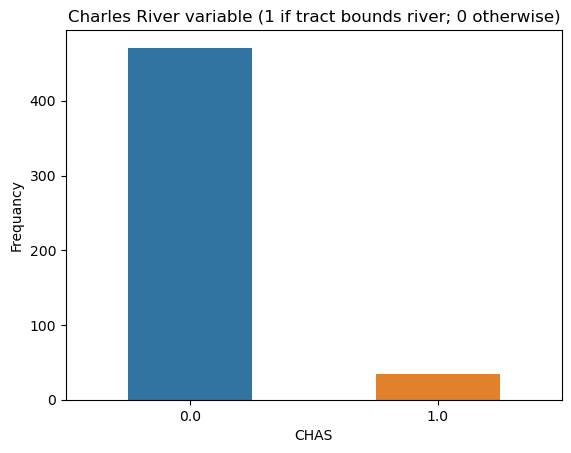

In [7]:
sns.countplot(data=boston_df,width=0.5, orient="h", x='CHAS')
plt.title('Charles River variable (1 if tract bounds river; 0 otherwise)')
plt.xlabel('CHAS')
plt.ylabel('Frequancy')
plt.show()

we can see from the bar plot above that the tracts bounds the river are too few in comparison with tracts that Not bound it.

## using boston data to visualize the distribuation of the MEDV vs the AGE discretized into 3 groups basen on the age variable.

In [19]:
MEDVvsAGE = boston_df[['MEDV','AGE']]
MEDVvsAGE.loc[(MEDVvsAGE['AGE'] <= 35), 'age_group'] = '35 years and younger'
MEDVvsAGE.loc[(MEDVvsAGE['AGE'] > 35) & (MEDVvsAGE['AGE'] <= 70), 'age_group'] = 'between 35 and 70'
MEDVvsAGE.loc[(MEDVvsAGE['AGE'] > 70), 'age_group'] = '70 years and older'
MEDVvsAGE.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12952\3885216141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MEDVvsAGE.loc[(MEDVvsAGE['AGE'] <= 35), 'age_group'] = '35 years and younger'


,MEDV,AGE,age_group
0,24.0,65.2,between 35 and 70
1,21.6,78.9,70 years and older
2,34.7,61.1,between 35 and 70
3,33.4,45.8,between 35 and 70
4,36.2,54.2,between 35 and 70


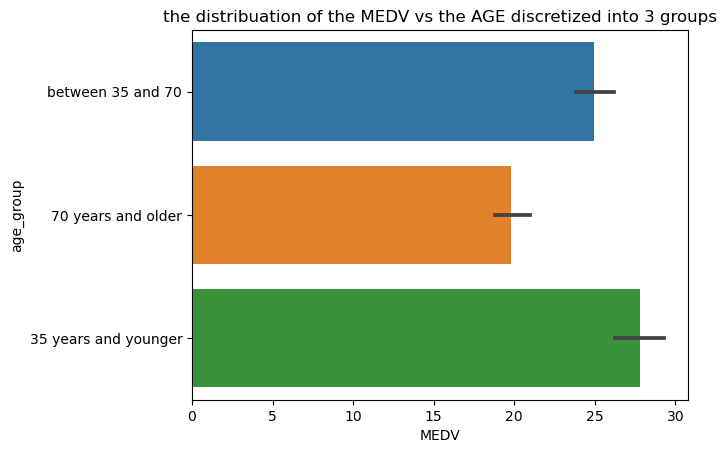

In [27]:
sns.barplot(data=MEDVvsAGE, x = 'MEDV', y='age_group')
plt.title('the distribuation of the MEDV vs the AGE discretized into 3 groups')
plt.xlabel('MEDV')
plt.ylabel('age_group')
plt.show()

As you can see in the barplot above there is not a big diffierence between the age groups vs the MEDV. 

## using boston data to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

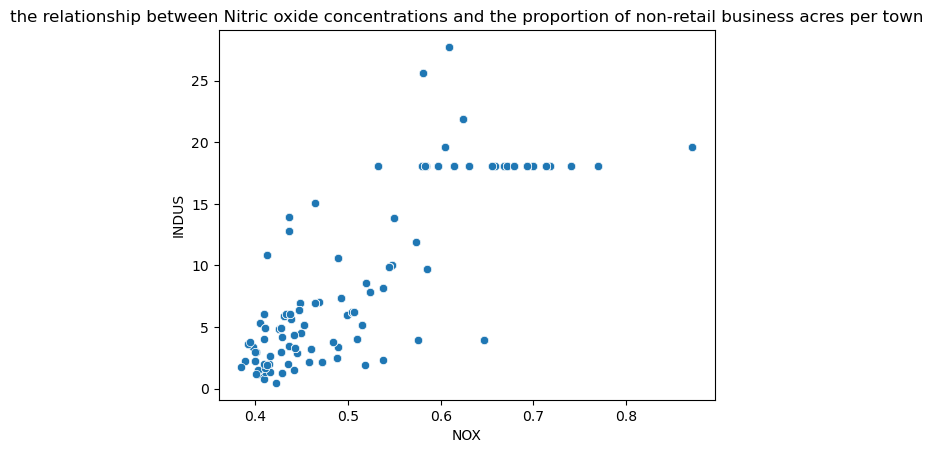

In [28]:
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')
plt.title('the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.xlabel('NOX')
plt.ylabel('INDUS')
plt.show()

we can determine that there is a postive relation between the previous variables.

## using boston data to show the distribution of the pupil to teacher ratio variable.

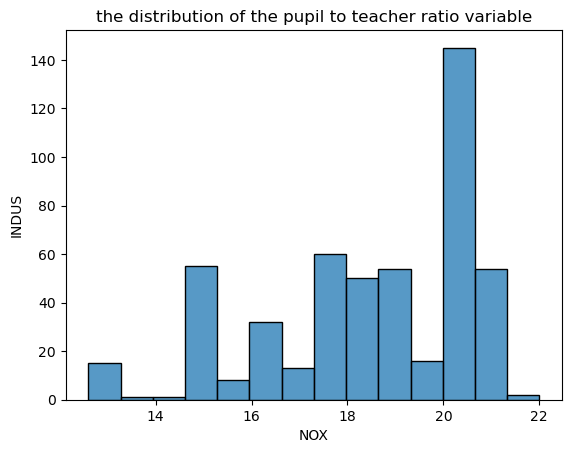

In [29]:
sns.histplot(data=boston_df, x='PTRATIO')
plt.title('the distribution of the pupil to teacher ratio variable')
plt.xlabel('NOX')
plt.ylabel('INDUS')
plt.show()

the previous plot show us that the data are skewed to the right and it has along tail to the low values, but it's centerd near to the value of 20.

# Tests

## test if there is diffirence between median value of houses bounded by the Charles river or not.
### state hypothesis:
* H_0: there is no difference in MEDV between the CHAS = 1 and CHAS = 0.
* H_1: there is a difference in MEDV between the CHAS = 1 and CHAS = 0.
### alpha = 0.05.

### levene test to check the normality of the data.

In [31]:
sc.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                boston_df[boston_df['CHAS'] == 0]['MEDV'] , center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [32]:
sc.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                boston_df[boston_df['CHAS'] == 0]['MEDV'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Based on the previous test we figure out that there is a difference in MEDV between the CHAS = 1 and CHAS = 0 because the p-value is smaller that the alpha.

## test if  there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

<p>
at first we will divide the age variable into 3 groups as the following:
</p>

1. 35 years and younger
2. between 35 and 70
3. 70 years and older

In [33]:
MEDVvsAGE.head()

,MEDV,AGE,age_group
0,24.0,65.2,between 35 and 70
1,21.6,78.9,70 years and older
2,34.7,61.1,between 35 and 70
3,33.4,45.8,between 35 and 70
4,36.2,54.2,between 35 and 70


### state hypothesis:
* H_0: there is no difference in the MEDV for each the three groups (have an eqaul mean).
* H_1: there is a difference in the MEDV for at least one of the group (has different mean).
### alpha = 0.05.

### levene test to check the normality of the data.

In [35]:
sc.stats.levene(MEDVvsAGE[MEDVvsAGE['age_group'] == '35 years and younger']['MEDV'],
                MEDVvsAGE[MEDVvsAGE['age_group'] == 'between 35 and 70']['MEDV'],
                MEDVvsAGE[MEDVvsAGE['age_group'] == '70 years and older']['MEDV'], center='mean'
)

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

the three groups has the same variance based on the p-vale of the levene test.

In [36]:
sc.stats.f_oneway(MEDVvsAGE[MEDVvsAGE['age_group'] == '35 years and younger']['MEDV'],
                MEDVvsAGE[MEDVvsAGE['age_group'] == 'between 35 and 70']['MEDV'],
                MEDVvsAGE[MEDVvsAGE['age_group'] == '70 years and older']['MEDV'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Based on the previous ANOVA test the p-value is smaller than the alpha value so we can reject the null hypothesis although we find that there is a difference in the MEDV for at least one of the group (has different mean).

## test whether the Nitric oxide concentrations has a relation with proportion of non-retail business acres per town ot not.

### States hypothesis
* H_0: Nitric oxide concentrations is not corelated with proportion of non-retail business acres per town.
* H_1: Nitric oxide concentrations is corelated with proportion of non-retail business acres per town.

### alpha 0.05

In [37]:
sc.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061239593e-98)

we see that the p-value is less than the alpha value so we can reject the null hypothesis and consider that the Nitric oxide concentrations is corelated with proportion of non-retail business acres per town.

## test whether if there is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes or not.
### States hypothesis
* H_0: the median value of owner occupied homes does not effected by the weighted distances to five Boston employment centres.
* H_1: the median value of owner occupied homes does effected by the weighted distances to five Boston employment centres.

### alpha 0.05


In [40]:
import statsmodels.api as sm
X = boston_df['DIS']
Y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.21e-08
Time:                        19:51:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

based on the previous regression test we find that the median value of owner occupied homes does effected by the weighted distances to five Boston employment centres.